In [1]:
from sklearn.decomposition import PCA
import pandas as pd


In [2]:
#read in the data
data = pd.read_csv('../data/crc_folfox_mut_cna_fus_clin.csv', index_col=0)
data.head()

,id_institution,id_drugs_list,OS,id_tt_os_g_mos,PFS,id_tt_pfs_m_g_mos,mut_CDK4,mut_CCND3,mut_CDH1,mut_CDK8,...,clin_ca_first_dmets1,clin_ca_crc_td,clin_ca_crc_crm,clin_ca_crc_peri_inv,clin_crc_type,OS_time,clin_Histology Category,clin_Histology,clin_Derived Grade or Differentiation of Tumor,clin_CEA
GENIE-DFCI-000233,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,100.986842,0.0,31.578947,0,0,0,0,...,5,2,2,0,2,3303,0,0,1,1.0
GENIE-DFCI-000247,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",1,35.789474,0.0,3.914474,0,0,0,0,...,0,2,0,0,2,1163,0,0,0,4.9
GENIE-DFCI-000306,DFCI,"bev, Fluorouracil, Leucovorin Calcium, Oxalipl...",0,38.125000,0.0,12.960526,0,0,0,0,...,1,2,2,0,3,1230,0,0,1,0.7
GENIE-DFCI-000738,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,51.578947,NaN,NaN,0,0,0,0,...,5,0,2,0,3,1623,0,1,1,1.8
GENIE-DFCI-000924,DFCI,"Fluorouracil, Leucovorin Calcium, Oxaliplatin",0,65.361842,NaN,NaN,0,0,0,0,...,5,0,2,1,0,2039,0,0,1,0.6


In [3]:
#count the number of unique indices
data.index.nunique()

1111

In [3]:
#keep only id_institution and clin_* columns
data = data.filter(regex='id_institution|clin_*')
data.shape

(1290, 22)

In [4]:
data.head()

,id_institution,clin_race_ethnicity,clin_naaccr_sex_code,clin_n_cpt_pt,clin_age_dx,clin_ca_grade,clin_institution,clin_stage_dx,clin_stage_dx_iv,clin_ca_path_group_stage,...,clin_ca_tx_pre_path_stage,clin_ca_first_dmets1,clin_ca_crc_td,clin_ca_crc_crm,clin_ca_crc_peri_inv,clin_crc_type,clin_Histology Category,clin_Histology,clin_Derived Grade or Differentiation of Tumor,clin_CEA
GENIE-DFCI-000233,DFCI,3,0,0,47.0,1,0,3,0,2,...,1,5,2,2,0,2,0,0,1,1.0
GENIE-DFCI-000247,DFCI,3,0,0,63.0,0,0,4,1,6,...,0,0,2,0,0,2,0,0,0,4.9
GENIE-DFCI-000306,DFCI,3,0,0,55.0,1,0,4,1,6,...,0,1,2,2,0,3,0,0,1,0.7
GENIE-DFCI-000738,DFCI,2,0,0,48.0,1,0,3,0,6,...,0,5,0,2,0,3,0,1,1,1.8
GENIE-DFCI-000924,DFCI,3,0,0,44.0,1,0,3,0,6,...,0,5,0,2,1,0,0,0,1,0.6


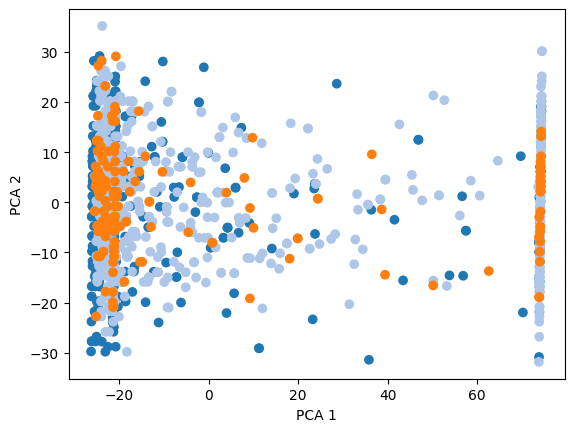

In [6]:
import matplotlib.pyplot as plt

# create a PCA object
pca = PCA(n_components=2)

# fit and transform the data
pca_data = pca.fit_transform(data.drop('id_institution', axis=1))

# create a scatter plot of the PCA data, colored by id_institution
unique_colors = data['id_institution'].unique()
colors = [plt.cm.tab20(i) for i in range(len(unique_colors))]
color_dict = dict(zip(unique_colors, colors))
color_list = [color_dict[id_inst] for id_inst in data['id_institution']]
plt.scatter(pca_data[:,0], pca_data[:,1], c=color_list)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


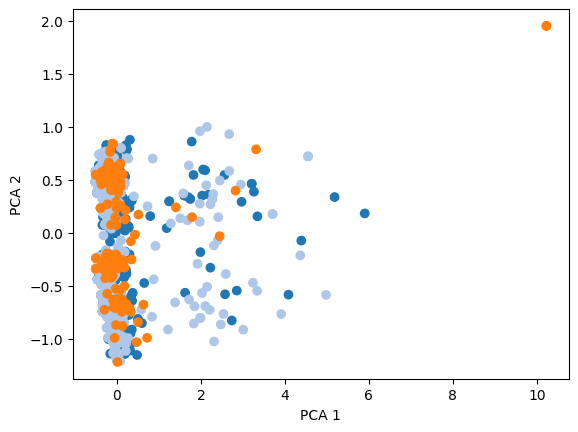

In [7]:
data = pd.read_csv('../data/crc_folfox_mut_cna_fus_clin.csv', index_col=0)

#keep only id_institution and mut_* columns
data_mut = data.filter(regex='id_institution|mut_*')
data_mut.shape

# create a PCA object
pca = PCA(n_components=2)

# fit and transform the data
pca_data = pca.fit_transform(data_mut.drop('id_institution', axis=1))

# create a scatter plot of the PCA data, colored by id_institution
unique_colors = data['id_institution'].unique()
colors = [plt.cm.tab20(i) for i in range(len(unique_colors))]
color_dict = dict(zip(unique_colors, colors))
color_list = [color_dict[id_inst] for id_inst in data['id_institution']]
plt.scatter(pca_data[:,0], pca_data[:,1], c=color_list)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [9]:
data_mut.shape

(1290, 225)

In [10]:
data_mut['id_institution'].value_counts()

id_institution
MSK     639
DFCI    501
VICC    150
Name: count, dtype: int64